### 1013 복습

#### 1

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

dt_clf = DecisionTreeClassifier()

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target)

dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier()

In [2]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.04390646,
       0.01715096, 0.        , 0.01829436, 0.        , 0.34333285,
       0.        , 0.14742205, 0.42989331])

In [4]:
for name, importance in zip(wine.feature_names, dt_clf.feature_importances_):
    print(f" {name} : {importance}")

 alcohol : 0.0
 malic_acid : 0.0
 ash : 0.0
 alcalinity_of_ash : 0.0
 magnesium : 0.04390646492434662
 total_phenols : 0.0171509628610729
 flavanoids : 0.0
 nonflavanoid_phenols : 0.018294360385144426
 proanthocyanins : 0.0
 color_intensity : 0.3433328472597055
 hue : 0.0
 od280/od315_of_diluted_wines : 0.1474220541036222
 proline : 0.4298933104661084


In [8]:
import pandas as pd
pd.DataFrame(data = dt_clf.feature_importances_,
             index = wine.feature_names, columns=['pct']).sort_values(by='pct',ascending=False)

best = pd.DataFrame(data = dt_clf.feature_importances_,
                    index = wine.feature_names, columns=['pct']).sort_values(by='pct',ascending=False)

best
best[:3]

,pct
proline,0.429893
color_intensity,0.343333
od280/od315_of_diluted_wines,0.147422


In [9]:
dic = {}

for name, importance in zip(wine.feature_names, dt_clf.feature_importances_):
    dic[name] = importance

sorted(dic.items(), key=lambda x : x[1], reverse=True)

[('proline', 0.4298933104661084),
 ('color_intensity', 0.3433328472597055),
 ('od280/od315_of_diluted_wines', 0.1474220541036222),
 ('magnesium', 0.04390646492434662),
 ('nonflavanoid_phenols', 0.018294360385144426),
 ('total_phenols', 0.0171509628610729),
 ('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('flavanoids', 0.0),
 ('proanthocyanins', 0.0),
 ('hue', 0.0)]

In [11]:
import pandas as pd
import numpy as np

In [14]:
data = pd.DataFrame(np.array(wine.data).reshape(1,13), columns = wine.feature_names)
data.T.sort_values(0,ascending = False)

ValueError: cannot reshape array of size 2314 into shape (1,13)

#### 2

GridSearchCV 함수의 파라미터 'n_jobs = -1' 은 CPU 전체를 다 쓰겠다는 의미

### 1014

### (2) 앙상블 학습

#### * 보팅 분류기 (Voting Classifier)
위스콘신 유방암 데이터 세트 예측 분석

In [15]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
#개별 모델은 로지스틱 회귀와 KNN 이다
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2, random_state = 156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc.round(4))

0.9561


In [18]:
#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, pred)
    class_name = classifier.__class__.__name__
    print("{0} 정확도: {1:.4f}".format(class_name, acc))

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


### (4) 랜덤 포레스트

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.getcwd()

In [73]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = \
    new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0],  axis=1)
    
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    
    return new_feature_name_df

In [77]:
def get_human_dataset():
    feature_name_df = pd.read_csv('jupyter_yj/1013/human_activity/features.txt', sep = '\s+',
                             header = None, names = ['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('jupyter_yj/1013/human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('jupyter_yj/1013/human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    y_train = pd.read_csv('jupyter_yj/1013/human_activity/train/y_train.txt',
                          sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('jupyter_yj/1013/human_activity/test/y_test.txt',
                         sep = '\s+', header = None, names = ['action'])
    
    return X_train, X_test, y_train, y_test

In [79]:
X_train, X_test, y_train, y_test = get_human_dataset()
y_test.values.shape

(2947, 1)

In [80]:
y_test

,action
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [82]:
#결정 트리에서 사용한 get_human_dataset() 함수를 이용해 학습/테스트용 DataFrame 변환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

accuracy_score(y_test, pred).round(4)

0.9196

#### * 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [83]:
rf_clf = RandomForestClassifier(n_estimators = 200, random_state = 0, n_jobs = -1, min_samples_split=3)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

accuracy_score(y_test, pred)

0.9267051238547676

In [84]:
#GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs= -1)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [85]:
#최적 하이퍼 파라미터
grid_cv.best_params_

{'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [86]:
#최고 예측 정확도
grid_cv.best_score_

0.9164853101196953

In [87]:
#예측 정확도
rf_clf1 = grid_cv.best_estimator_
pred = rf_clf1.predict(X_test)
accuracy_score(y_test, pred)

0.9260264675941635

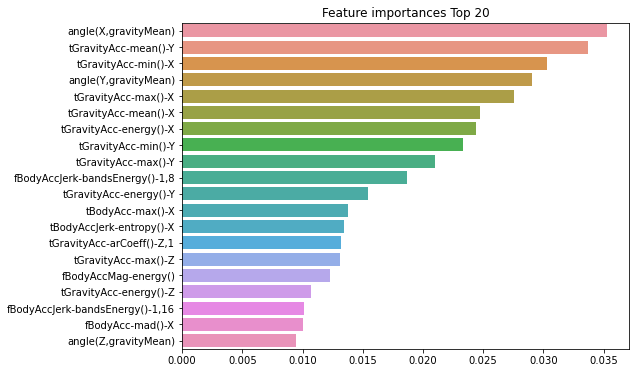

In [88]:
#피처의 중요도 막대그래프 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20 , y = ftr_top20.index)
plt.show()

### (4) GBM(Gradient Boosting Machine)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [41]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

#GBM 정확도
accuracy_score(y_test, gb_pred)

### (5) XGBoost (eXtra Gradiendt Boost)
XGBoost 설치하기<br>
anaconda prompt 실행<br>


In [43]:
import xgboost

In [44]:
xgboost.__version__

'1.5.0'

#### * 위스콘신 유방암 데이터 세트 예측 분석

In [60]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [61]:
#데이터 불러오기
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=156)

#검증용 데이터 생성
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=156)

In [62]:
#warning 메세지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3,
                           eval_metric = 'logloss')

xgb_wrapper.fit(X_train, y_train, verbose=True)
w_pred = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [63]:
#평가 지표 모음
def get_clf_eval(y_test, pred, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [64]:
get_clf_eval(y_test, w_pred, w_pred_proba)

[[34  3]
 [ 1 76]]

 정확도: 0.9649 
 정밀도: 0.9620 
 재현율: 0.9870 
 f1_스코어: 0.9744 
 AUC: 0.9954


In [65]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [67]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [66]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [68]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)] # 미입력해도 됨

xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", 
                eval_set=evals, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws50_preds, ws50_pred_proba)

[[34  3]
 [ 2 75]]

 정확도: 0.9561 
 정밀도: 0.9615 
 재현율: 0.9740 
 f1_스코어: 0.9677 
 AUC: 0.9933


In [ ]:
#빨리 멈춰도 정확도에 큰 차이는 없다

In [90]:
#early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10,
               eval_metric = 'logloss', eval_set=evals, verbose=True)

ws10_pred = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, ws10_pred, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

ValueError: Feature shape mismatch, expected: 30, got 561